In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [36]:
customers_df = pd.read_csv("assessment_customers.csv")
subscriptions_df = pd.read_csv("assessment_subscriptions.csv")
charges_df = pd.read_csv("assessment_charges.csv")

In [4]:
# Create a timestamp to keep help determine the length of the active subscriptions
timestamp = (datetime.datetime(2023, 2, 23))
time_stamp = timestamp.today()
today = time_stamp.strftime('%m/%d/%y %H:%M')
today

'02/27/23 19:13'

In [5]:
# Replace the null values of the "last_active_month" column with "today" date values
# for only rows with null values for "cancelled_at", fill them with 0. Later we can select all CANCELLED status rows that do not lack a cancelled_at date.
# The CANCELLED status rows with missing "cancelled_at" dates will be voided in this assessment.
subscriptions_df.loc[subscriptions_df['status'] == 'CANCELLED', "cancelled_at"]= subscriptions_df.loc[subscriptions_df['status'] == 'CANCELLED', "cancelled_at"].fillna(0)
# Create a "last_active_month" column that contains an upper limit for the calculation of each active subscription's duration
subscriptions_df["last_active_month"] = subscriptions_df["cancelled_at"]
# Replace the null values of the "last_active_month" column with "today" date values. This will only replace the null values in the "ACTIVE" status rows.
subscriptions_df["last_active_month"] = subscriptions_df["last_active_month"].fillna(today)

In [6]:
# Create the parental dataframe that will contain all valid data, according to our assumptions.
# Only operate on subscriptions that are either active, or have been cancelled and have a valid "vancelled_at" date.
subscriptions_df=subscriptions_df.loc[(subscriptions_df["status"]=='ACTIVE')|(subscriptions_df["cancelled_at"]!=0)]

In [7]:
subscriptions_df

,subscription_id,customer_id,address_id,status,product_title,recurring_price,quantity,created_at,cancelled_at,last_active_month
0,155517507,65434304,69830954,CANCELLED,Adrenal Super Tonic,26.78,1,5/21/21 16:18,7/26/21 18:40,7/26/21 18:40
1,155517510,65434304,69830954,CANCELLED,Activated Charcoal,22.05,1,5/21/21 16:18,7/26/21 18:40,7/26/21 18:40
2,155517518,65434304,69830954,CANCELLED,Golden Mind,26.25,1,5/21/21 16:18,7/26/21 18:40,7/26/21 18:40
3,155517524,65434304,69830954,CANCELLED,Elderberry Defense,22.05,1,5/21/21 16:18,7/26/21 18:40,7/26/21 18:40
4,155517525,65434304,69830954,CANCELLED,Longevity Mushrooms,25.20,1,5/21/21 16:18,7/26/21 18:40,7/26/21 18:40
...,...,...,...,...,...,...,...,...,...,...
339020,335171272,106388353,116607381,ACTIVE,Adrenal Super Tonic,40.60,1,2/20/23 14:50,NaN,02/27/23 19:13
339021,335171273,106388353,116607381,ACTIVE,Magnesium L-Threonate,47.60,1,2/20/23 14:50,NaN,02/27/23 19:13
339022,335171274,106388353,116607381,ACTIVE,Liposomal Glutathione,61.60,1,2/20/23 14:50,NaN,02/27/23 19:13
339023,335171275,106388353,116607381,ACTIVE,Mineral Shilajit,46.90,1,2/20/23 14:50,NaN,02/27/23 19:13


In [8]:
subscriptions_df['created_at'] = pd.to_datetime(subscriptions_df['created_at'])
subscriptions_df['last_active_month'] = pd.to_datetime(subscriptions_df['last_active_month'])

In [9]:
# Create a column with a list of all the months in which each subscription was active.
active_months = np.vectorize(lambda x, y: pd.period_range(x, y, freq='M').to_list())
subscriptions_df['active_months'] = active_months(subscriptions_df['created_at'], subscriptions_df['last_active_month'])

In [10]:
subscriptions_df

,subscription_id,customer_id,address_id,status,product_title,recurring_price,quantity,created_at,cancelled_at,last_active_month,active_months
0,155517507,65434304,69830954,CANCELLED,Adrenal Super Tonic,26.78,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,"[2021-05, 2021-06, 2021-07]"
1,155517510,65434304,69830954,CANCELLED,Activated Charcoal,22.05,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,"[2021-05, 2021-06, 2021-07]"
2,155517518,65434304,69830954,CANCELLED,Golden Mind,26.25,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,"[2021-05, 2021-06, 2021-07]"
3,155517524,65434304,69830954,CANCELLED,Elderberry Defense,22.05,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,"[2021-05, 2021-06, 2021-07]"
4,155517525,65434304,69830954,CANCELLED,Longevity Mushrooms,25.20,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,"[2021-05, 2021-06, 2021-07]"
...,...,...,...,...,...,...,...,...,...,...,...
339020,335171272,106388353,116607381,ACTIVE,Adrenal Super Tonic,40.60,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,[2023-02]
339021,335171273,106388353,116607381,ACTIVE,Magnesium L-Threonate,47.60,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,[2023-02]
339022,335171274,106388353,116607381,ACTIVE,Liposomal Glutathione,61.60,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,[2023-02]
339023,335171275,106388353,116607381,ACTIVE,Mineral Shilajit,46.90,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,[2023-02]


In [11]:
history_of_all_subscriptions = subscriptions_df.explode('active_months')

In [12]:
history_of_all_subscriptions

,subscription_id,customer_id,address_id,status,product_title,recurring_price,quantity,created_at,cancelled_at,last_active_month,active_months
0,155517507,65434304,69830954,CANCELLED,Adrenal Super Tonic,26.78,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-05
0,155517507,65434304,69830954,CANCELLED,Adrenal Super Tonic,26.78,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-06
0,155517507,65434304,69830954,CANCELLED,Adrenal Super Tonic,26.78,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-07
1,155517510,65434304,69830954,CANCELLED,Activated Charcoal,22.05,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-05
1,155517510,65434304,69830954,CANCELLED,Activated Charcoal,22.05,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-06
...,...,...,...,...,...,...,...,...,...,...,...
339020,335171272,106388353,116607381,ACTIVE,Adrenal Super Tonic,40.60,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,2023-02
339021,335171273,106388353,116607381,ACTIVE,Magnesium L-Threonate,47.60,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,2023-02
339022,335171274,106388353,116607381,ACTIVE,Liposomal Glutathione,61.60,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,2023-02
339023,335171275,106388353,116607381,ACTIVE,Mineral Shilajit,46.90,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,2023-02


In [13]:
# NOW, select only the 'CANCELLED' columns
cancelled_subs_df=history_of_all_subscriptions.loc[(subscriptions_df["status"]=='CANCELLED')]

In [14]:
cancelled_subs_df["last_active_month"]=pd.to_datetime(cancelled_subs_df["last_active_month"]).dt.to_period('M')

/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
churn_rate_df = cancelled_subs_df.groupby(["subscription_id","customer_id","last_active_month","active_months"])["quantity"].sum()
# display the resulting grouped dataframe
churn_reset_df = churn_rate_df.reset_index()
churn_reset_df

,subscription_id,customer_id,last_active_month,active_months,quantity
0,155517507,65434304,2021-07,2021-05,1
1,155517507,65434304,2021-07,2021-06,1
2,155517507,65434304,2021-07,2021-07,1
3,155517510,65434304,2021-07,2021-05,1
4,155517510,65434304,2021-07,2021-06,1
...,...,...,...,...,...
701831,335166724,94841798,2023-02,2023-02,1
701832,335168888,102016300,2023-02,2023-02,1
701833,335169424,102016300,2023-02,2023-02,1
701834,335170421,102016300,2023-02,2023-02,1


In [16]:
churn_reset_df["active_subscriptions"] = 0


In [17]:
churn_reset_df["active_subscriptions"] = (churn_reset_df["active_months"] != churn_reset_df["last_active_month"]).astype(int)

In [18]:
churn_reset_df= churn_reset_df[['customer_id', 'active_months', 'active_subscriptions']]


In [19]:
# since we sort this column by customer_id and by month in (both in ascending order), we can see that every time a customer quantity of subscriptions goes from 1 to 0
# as were looking at each customer's total subscriptions per month, when one row has a total subscription of >1, and the next row has total subs = 0, this is a lost customer event.
# We can then count these events to determine the number of lost customers per month
churn_reset_df.sort_values(by=['customer_id', 'active_months'], inplace=True)
churn_reset_df

/Applications/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,customer_id,active_months,active_subscriptions
208734,65164691,2021-12,1
208735,65164691,2022-01,1
208736,65164691,2022-02,1
208737,65164691,2022-03,1
208738,65164691,2022-04,1
...,...,...,...
701699,106348389,2023-02,0
701700,106348389,2023-02,0
701770,106369579,2023-02,0
701771,106369579,2023-02,0


In [20]:
churn_reset_df.to_csv("churn_reset_df.csv")

In [21]:
# performing a lambda function that checks each row, shifts the x position present row to look for 1 and make the next row relative to the x position to look for a value of 0
# If this event occurs, the script records a boolean value of True
# The final output is a list of boolean values. This list shares index positions (conserves customer_id and acfive_months values per row.) with the parental churn_reset_df dataframe.
lost_customers = churn_reset_df.groupby('customer_id')['active_subscriptions'].apply(lambda x: (x == 1) & (x.shift(-1) == 0)).sum(level=0)

In [22]:
lost_customers

208734    False
208735    False
208736    False
208737    False
208738     True
          ...  
701699    False
701700    False
701770    False
701771    False
701772    False
Name: active_subscriptions, Length: 701836, dtype: bool

In [23]:
# Since the lost customers and churn_rest_df have the same index positions in their lists, we can group the lost customers list by the "active_subscriptions" column.
# And then perform a sum function to total all the True values (lost customer events, per month). This yields to the total number of lost customers per month.
lost_customers_per_month_df = lost_customers.groupby(churn_reset_df['active_months']).sum()


In [24]:
# Number of customers lost per month
lost_customers_per_month_df

active_months
2021-05     149.0
2021-06    1051.0
2021-07    5517.0
2021-08    1613.0
2021-09    1539.0
2021-10    1193.0
2021-11    1551.0
2021-12    1701.0
2022-01    2150.0
2022-02    2576.0
2022-03    3003.0
2022-04    3892.0
2022-05    3564.0
2022-06    4085.0
2022-07    4416.0
2022-08    4806.0
2022-09    5283.0
2022-10    5944.0
2022-11    6609.0
2022-12    7366.0
2023-01    5765.0
2023-02       0.0
Freq: M, Name: active_subscriptions, dtype: float64

In [25]:
lost_customers_per_month_df.to_csv("lost_customers_per_month.csv")

In [26]:
# I exported this csv file to show that the index values of the lost_customers_per_month_df and the lost_customers series are the same. So they can be grouped together.
lost_customers.to_csv("lost_customers.csv")

In [27]:
# Continuing churn rate calculation: get the total number of customers per month, meaning groupby the numebr of unique of the total active customers per month (use .nunique())
# First go back to the parental dataframe
history_of_all_subscriptions


,subscription_id,customer_id,address_id,status,product_title,recurring_price,quantity,created_at,cancelled_at,last_active_month,active_months
0,155517507,65434304,69830954,CANCELLED,Adrenal Super Tonic,26.78,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-05
0,155517507,65434304,69830954,CANCELLED,Adrenal Super Tonic,26.78,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-06
0,155517507,65434304,69830954,CANCELLED,Adrenal Super Tonic,26.78,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-07
1,155517510,65434304,69830954,CANCELLED,Activated Charcoal,22.05,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-05
1,155517510,65434304,69830954,CANCELLED,Activated Charcoal,22.05,1,2021-05-21 16:18:00,7/26/21 18:40,2021-07-26 18:40:00,2021-06
...,...,...,...,...,...,...,...,...,...,...,...
339020,335171272,106388353,116607381,ACTIVE,Adrenal Super Tonic,40.60,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,2023-02
339021,335171273,106388353,116607381,ACTIVE,Magnesium L-Threonate,47.60,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,2023-02
339022,335171274,106388353,116607381,ACTIVE,Liposomal Glutathione,61.60,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,2023-02
339023,335171275,106388353,116607381,ACTIVE,Mineral Shilajit,46.90,1,2023-02-20 14:50:00,NaN,2023-02-27 19:13:00,2023-02


In [29]:
all_active_subs_at_one_point = history_of_all_subscriptions.copy()

In [30]:
# Second proposed method to get the count of all active customers per month.
# Because, we want to avoid calculating the count of all subscriptions per month here you have only the quantity of subscriptions per month.
# make sure to calculate the count of unique customer_id's from the subscriptions.csv file to confirm these results.
all_customers_per_month_df = all_active_subs_at_one_point.groupby("active_months")["customer_id"].nunique()

In [31]:
all_customers_per_month_df

active_months
2021-05      422
2021-06     8438
2021-07     8533
2021-08     8827
2021-09     5068
2021-10     5238
2021-11     5310
2021-12     5435
2022-01     6629
2022-02     7463
2022-03     8998
2022-04    11298
2022-05    12579
2022-06    13269
2022-07    14271
2022-08    15479
2022-09    17008
2022-10    18303
2022-11    21353
2022-12    22789
2023-01    24782
2023-02    25175
Freq: M, Name: customer_id, dtype: int64

In [32]:
############# SOLUTION TO Question #1: Monthly Customer Churn Rate###########################################################################################
churn_rate = 100*(lost_customers_per_month_df/all_customers_per_month_df)
churn_rate

In [34]:
churn_rate.to_csv("churn_rate.csv")

<Figure size 720x432 with 0 Axes>

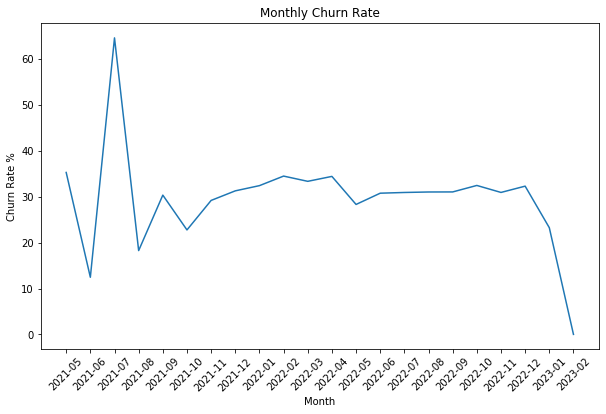

<Figure size 720x432 with 0 Axes>

In [33]:
xvalues = [str(x) for x in churn_rate.index]

plt.figure(figsize=(10,6))
plt.plot(xvalues,churn_rate)
plt.title("Monthly Churn Rate")
plt.ylabel("Churn Rate %")
plt.xlabel("Month")
plt.xticks(rotation=45)

plt.figure(figsize=(10,6))
